# DAT257x: Reinforcement Learning Explained

## Lab 1: Environments and Agents

### Exercise 3: Random Agent

Now that you have examine the SimpleRoomsEnv and CliffWalkingEnv environments in the Environments.py file, let's play around with an agent in those environments.

In [10]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.simulation import Experiment

In [12]:
shape = (7, 10)
nS = np.prod(shape)
nA = 4
winds = np.zeros(shape)
winds[:,[3,4,5,8]] = 1
winds[:,[6,7]] = 2

In [17]:
def _limit_coordinates(coord):
    coord[0] = min(coord[0], shape[0] - 1)
    coord[0] = max(coord[0], 0)
    coord[1] = min(coord[1], shape[1] - 1)
    coord[1] = max(coord[1], 0)
    return coord

In [23]:
def _calculate_transition_prob(current, delta, winds):
    print(tuple(current))
    print(winds[tuple(current)])
    new_position = np.array(current) + np.array(delta) + np.array([-1, 0]) * winds[tuple(current)]
    new_position = _limit_coordinates(new_position).astype(int)
    new_state = np.ravel_multi_index(tuple(new_position), shape)
    is_done = tuple(new_position) == (3, 7)
    return [(1.0, new_state, -1.0, is_done)]

In [24]:
P = {}
s = 36
position = np.unravel_index(s, shape)
P[s] = { a : [] for a in range(nA) }
#UP = 0
#RIGHT = 1
#DOWN = 2
#LEFT = 3
P[s][0] = _calculate_transition_prob(position, [-1, 0], winds)
print("P[{0}][0] = {1}".format(s, P[s][0]))
P[s][1] = _calculate_transition_prob(position, [0, 1], winds)
print("P[{0}][1] = {1}".format(s, P[s][1]))
P[s][2] = _calculate_transition_prob(position, [1, 0], winds)
print("P[{0}][2] = {1}".format(s, P[s][2]))
P[s][3] = _calculate_transition_prob(position, [0, -1], winds)
print("P[{0}][3] = {1}".format(s, P[s][3]))

(3, 6)
2.0
P[36][0] = [(1.0, 6, -1.0, False)]
(3, 6)
2.0
P[36][1] = [(1.0, 17, -1.0, False)]
(3, 6)
2.0
P[36][2] = [(1.0, 26, -1.0, False)]
(3, 6)
2.0
P[36][3] = [(1.0, 15, -1.0, False)]


Below is the agent interface. At the minimum, an agent will have an act() function that takes an observation, and return an action.

In [2]:
class Agent(object):

    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, obs):
        raise NotImplementedError

We've given you the implementation of a random agent. It's act() function will just return a random action within the valid action space.

In [3]:
class RandomAgent(Agent):
    
    def __init__(self, actions):
        super(RandomAgent, self).__init__(actions)
    
    def act(self, obs):
        return np.random.randint(0, self.num_actions)

Now let's run the experiment. We'll start with the SimpleRoomsEnv environment, with just 5 episodes.

In [4]:
interactive = True
%matplotlib nbagg    

<IPython.core.display.Javascript object>


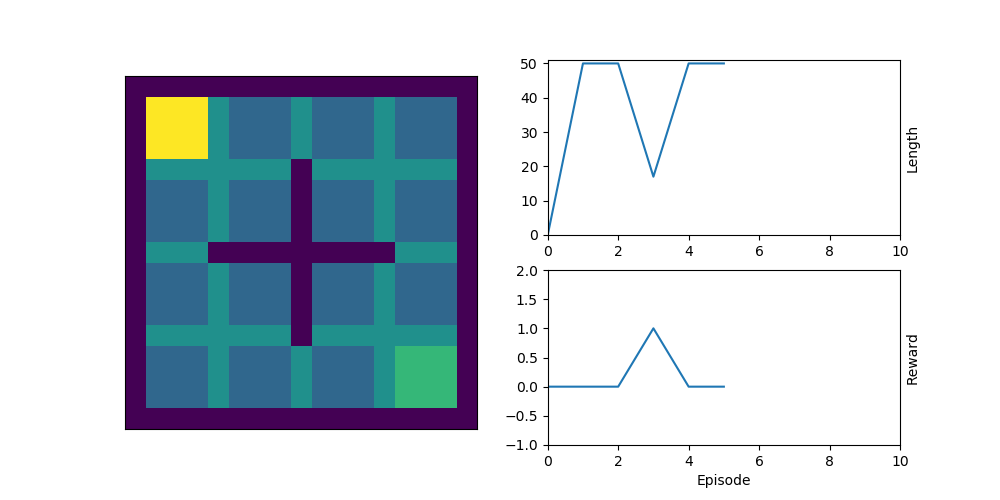

reward =  0
reward =  0
reward =  1
reward =  0
reward =  0


In [5]:
max_number_of_episodes = 5
env = SimpleRoomsEnv()
agent = RandomAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, interactive)

Let's do one with the CliffWalkingEnv environment. This time with 10 episodes.

In [6]:
max_number_of_episodes = 10
env = CliffWalkingEnv()

Entering CliffWalkingEnv()


<IPython.core.display.Javascript object>


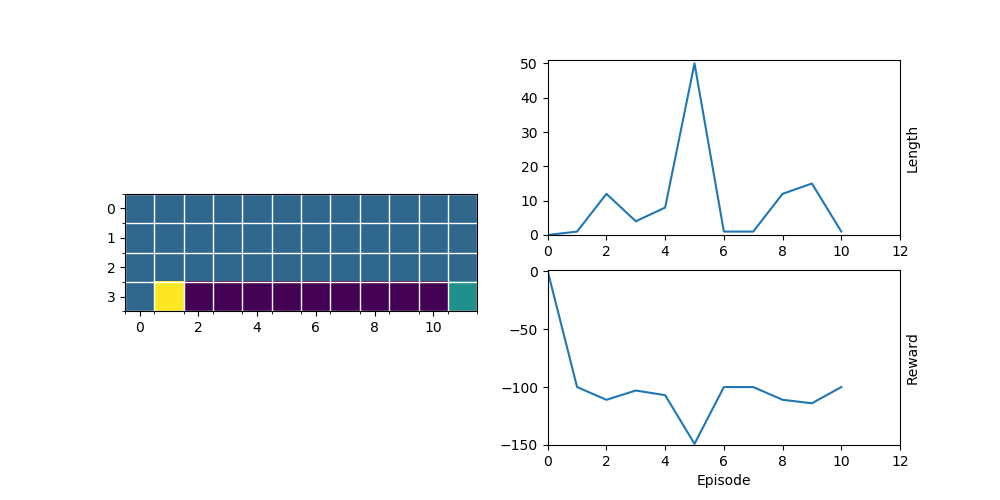

reward =  -100.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -100.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -100.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -100.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
reward =  -1.0
re

In [7]:
agent = RandomAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, interactive)

Let's set interactive to False, and run the experiments again. This time with 100 episodes each.

In [8]:
max_number_of_episodes = 10
env = WindyGridworldEnv()

<IPython.core.display.Javascript object>


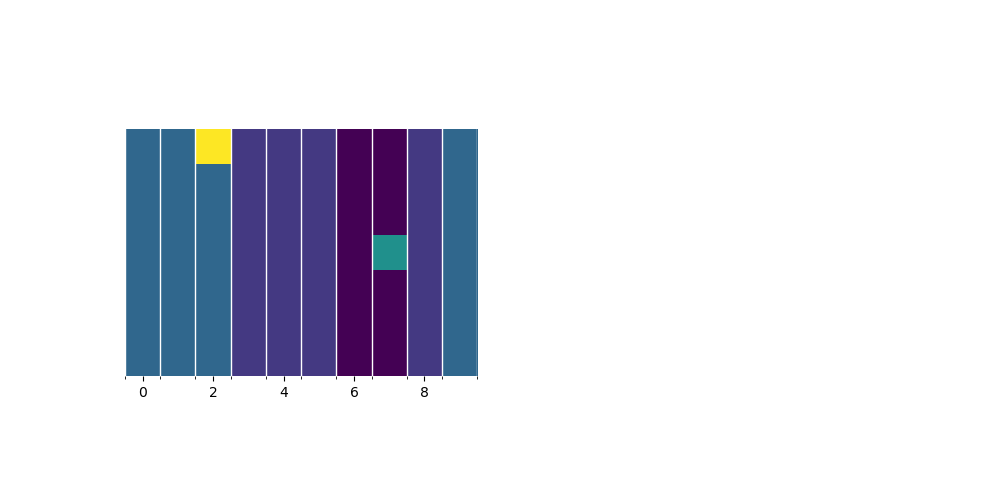

KeyboardInterrupt: 

In [9]:
agent = RandomAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, interactive)

In [13]:
interactive = False
%matplotlib inline  

Entering SimpleRoomsEnv
reward =  0
reward =  0
reward =  0
reward =  0
reward =  1
reward =  0
reward =  1
reward =  0
reward =  1
reward =  0
reward =  0
reward =  0
reward =  0
reward =  0
reward =  1
reward =  1
reward =  0
reward =  1
reward =  0
reward =  1
reward =  1
reward =  1
reward =  1
reward =  0
reward =  1
reward =  1
reward =  1
reward =  0
reward =  0
reward =  1
reward =  1
reward =  1
reward =  1
reward =  0
reward =  1
reward =  1
reward =  0
reward =  1
reward =  1
reward =  0
reward =  0
reward =  1
reward =  0
reward =  0
reward =  0
reward =  1
reward =  1
reward =  0
reward =  1
reward =  0
reward =  1
reward =  1
reward =  0
reward =  1
reward =  1
reward =  1
reward =  0
reward =  0
reward =  1
reward =  1
reward =  0
reward =  0
reward =  1
reward =  0
reward =  1
reward =  1
reward =  0
reward =  0
reward =  0
reward =  0
reward =  0
reward =  0
reward =  1
reward =  1
reward =  0
reward =  1
reward =  1
reward =  1
reward =  1
reward =  0
reward =  0
rewa

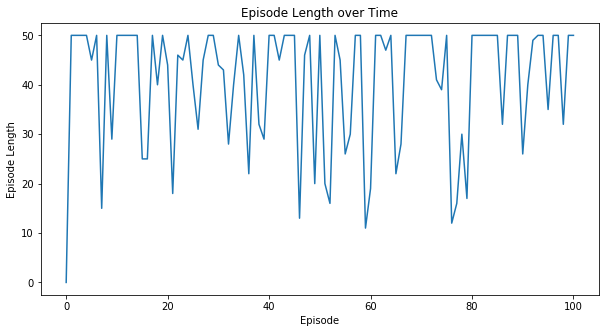

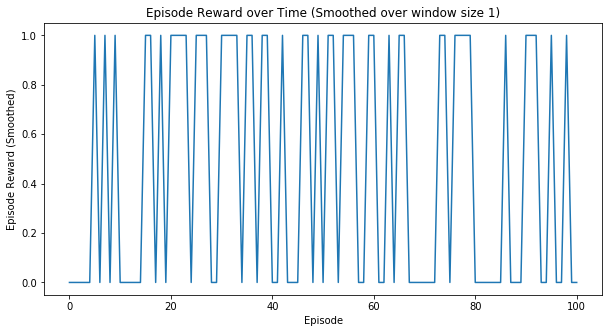

In [15]:
max_number_of_episodes = 100
env = SimpleRoomsEnv()
agent = RandomAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, interactive)

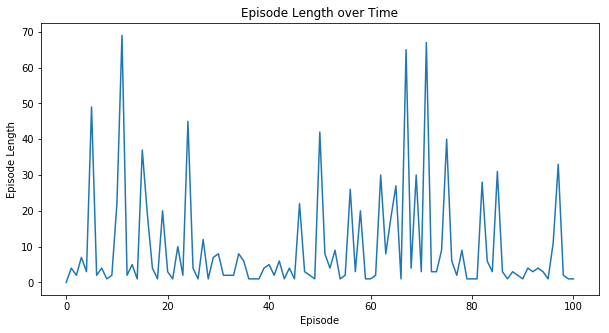

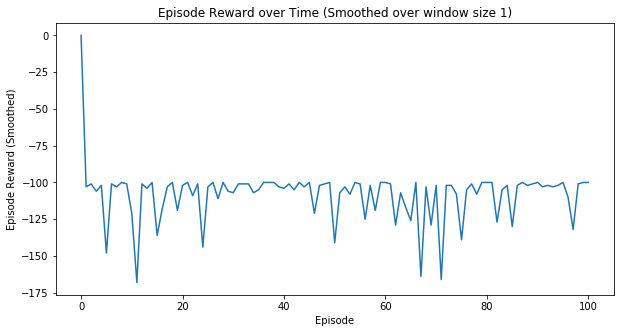

In [22]:
max_number_of_episodes = 100
env = CliffWalkingEnv()
agent = RandomAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_agent(max_number_of_episodes, interactive)